# 2 задание
Требуется обучить модель на основе SVM для распознавания рукописных цифр из набора MNIST.В качестве модели применяется LinearSVC. В качестве вектора признаков можно взять линеаризованное изображение, значения элементов от 0 (черный) до 1 (белый). 

## 1 этап
Загрузка данных.
Набор данных MNIST загружаем из пакета keras.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from random import randint

In [2]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
# массивы X содержат grayscale изображения цифр, массивы Y - метки
# train - обучающая выборка, test - тестовая выборка
# обучающая выборка нужна для обучения модели  LinearSVC.
# тестовая выборка для тестирования нашей обученной модели
(x_train, y_train), (test_x, test_y) = mnist.load_data()
copy_test_x = test_x # копия тестового набора для ручной проверки

Подготовка данных.

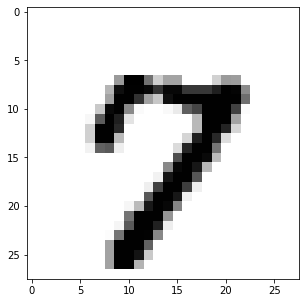

In [3]:
# отобразим элемент для обучения
from matplotlib import pyplot
pyplot.figure(2, figsize=(5, 5))
i = randint(0,1000)
pyplot.imshow(x_train[i], cmap = plt.cm.binary)
pyplot.show()

In [4]:
# образцы из набора размера 28x28 пикселей
# переведем матрицу 28*28 в вектор из 784 элементов для каждого изображения
num_pixels = x_train.shape[1] * x_train.shape[2]
# преобразование в float32
x_train, test_x = np.array(x_train, np.float32), np.array(test_x, np.float32)
# перевод матрицы в вектор
x_train, test_x = x_train.reshape([-1, 784]), test_x.reshape([-1, 784])
# нормализуем входные данные в [0,1]
# значение пикселя от 0 до 255
x_train = x_train / 255
test_x = test_x / 255

 ## 2 этап
 Процесс обучения

Метод опорных векторов SVM (Support Vector Machines) — это линейный алгоритм используемый в задачах классификации и регрессии. 
Основной задачей алгоритма является найти наиболее правильную линию, или гиперплоскость разделяющую данные на два класса

In [5]:
import sklearn.svm as svm
from sklearn.svm import LinearSVC
svm_mimi = svm.LinearSVC(dual = True,max_iter=100000)
svm_mimi.fit(x_train,y_train)

LinearSVC(max_iter=100000)

## 3 этап


 Ручная проверка качества распознавания на нескольких образцах

Ручная проверка качества распознавания на образцах
1 образец
тестовая выборка -  9
предсказание -  9


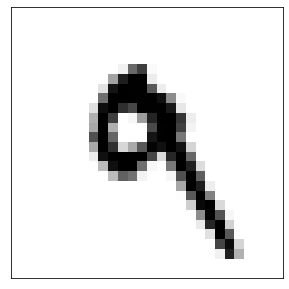

2 образец
тестовая выборка -  5
предсказание -  5


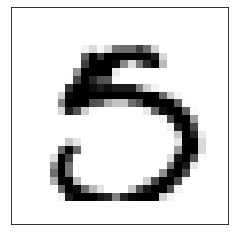

In [6]:
y_predict = svm_mimi.predict(test_x) # учитывая обученную модель, спрогнозируем метку нового набора данных

pyplot.figure(2, figsize=(5, 5))
i1 = randint(0, 100)
i2 = randint(101, 1000)
print("Ручная проверка качества распознавания на образцах")
print("1 образец")
print("тестовая выборка - ", test_y[i1])
print("предсказание - ", y_predict[i1])
pyplot.xticks([])
pyplot.yticks([])
pyplot.imshow(copy_test_x[i1], cmap = plt.cm.binary) # отображение изображения из тестовой выборки
pyplot.show()

print("2 образец")
print("тестовая выборка - ", test_y[i2])
print("предсказание - ", y_predict[i2])
pyplot.xticks([])
pyplot.yticks([])
pyplot.imshow(copy_test_x[i2], cmap = plt.cm.binary) # отображение изображения из тестовой выборки
pyplot.show()


## confusion matrix

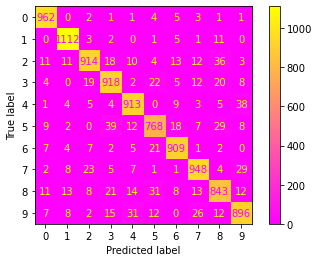

In [7]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_mimi, test_x, test_y, cmap=plt.cm.spring)

Выполнила Брындина Анна 305 группа